In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 25.0MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , Flatten , BatchNormalization  , MaxPooling2D , Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validition_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validition_ds = validition_ds.map(process)

In [7]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data = validition_ds)

Epoch 1/10
625/625 [==============================] - 103s 148ms/step - loss: 1.4507 - accuracy: 0.5972 - val_loss: 0.7077 - val_accuracy: 0.6230
Epoch 2/10
625/625 [==============================] - 86s 137ms/step - loss: 0.5612 - accuracy: 0.7145 - val_loss: 0.4914 - val_accuracy: 0.7635
Epoch 3/10
625/625 [==============================] - 87s 139ms/step - loss: 0.5088 - accuracy: 0.7546 - val_loss: 0.5295 - val_accuracy: 0.7258
Epoch 4/10
625/625 [==============================] - 88s 140ms/step - loss: 0.4338 - accuracy: 0.7987 - val_loss: 0.3495 - val_accuracy: 0.8518
Epoch 5/10
625/625 [==============================] - 87s 138ms/step - loss: 0.3718 - accuracy: 0.8338 - val_loss: 0.3551 - val_accuracy: 0.8457
Epoch 6/10
625/625 [==============================] - 87s 139ms/step - loss: 0.3106 - accuracy: 0.8658 - val_loss: 0.5108 - val_accuracy: 0.8024
Epoch 7/10
625/625 [==============================] - 88s 141ms/step - loss: 0.2306 - accuracy: 0.9044 - val_loss: 0.3350 - val_a

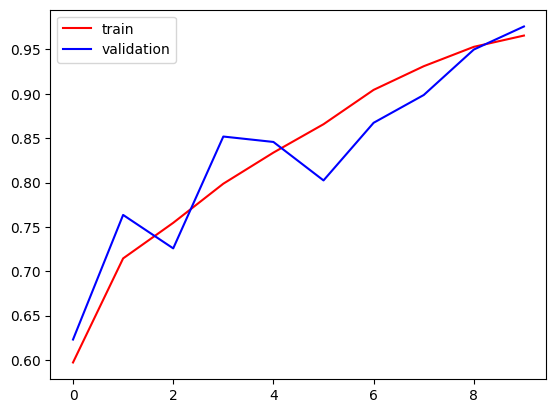

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

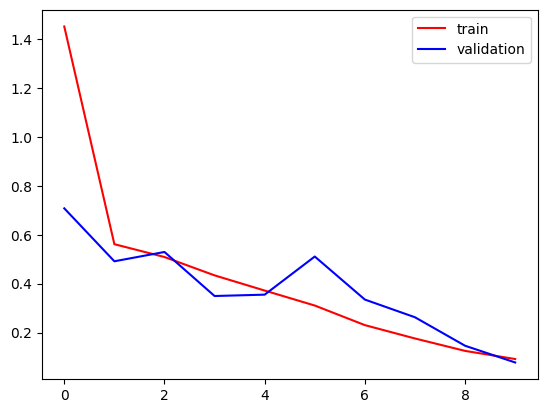

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [30]:
test_img = cv2.imread('/content/download.jpeg')

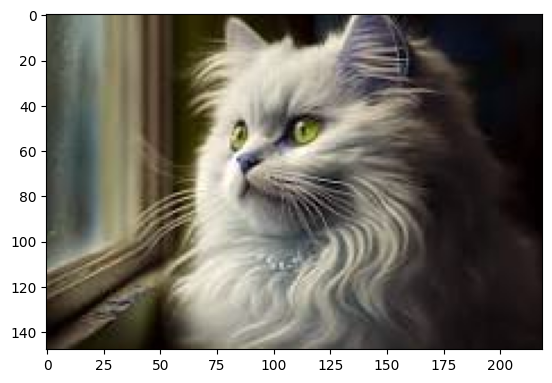

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(148, 219, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.26725686]], dtype=float32)